### Домашнее задание к лекции 4.2 «Визуализация данных»
Решение выполнения задач необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в GitHub.
В файле должны быть сохранены результаты запуска на тестовых данных.
### Дано: 
* данные о популярности имен для новорожденных, скачивается по ссылке (https://www.ssa.gov/oact/babynames/names.zip). 
* добавлять исходные данные в репозиторий с выполненным заданием необязательно, 
* в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.
### Задания:
* Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
* Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
* Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
* Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
    * необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, 
    * посчитать количество согласных букв в каждом имени и 
    * вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [1]:
import pandas as pd

import os.path 

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

path_to_file = '/Users/mykolapashkovsky/Dropbox/Git/netology/PY2PM/PY4_1/names/'

In [2]:
def count_top3(years):
    cols = ['Name', 'Gender','Count']
    file = {}
    for year in years:
        file[year] = pd.read_csv(os.path.join(path_to_file,'yob{0}.txt'.format(year)), names=cols)
    return response


### 1) Построить график изменения количества имен Ruth и Robert с 1900 по 2000

In [3]:
def dynamics_names(year_from, year_to, period, tp):
    cols = ['Name', 'Gender','Count']
    file = {}
    for year in range(year_from, year_to, period):
        file[year] = pd.read_csv(os.path.join(path_to_file,'yob{0}.txt'.format(year)), names=cols)
    names_all = pd.concat(file, names=['Year'])
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    name_dynamics = name_dynamics.query('Name == ["Ruth","Robert"]').unstack('Name').plot(kind=tp, title='Dynamics of select names', grid=True)
    response = name_dynamics
    return response

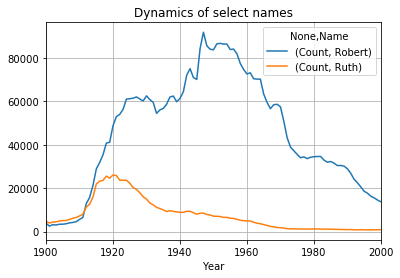

In [4]:
dynamics_names(1900, 2001, 1, 'line')

### 2) Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)

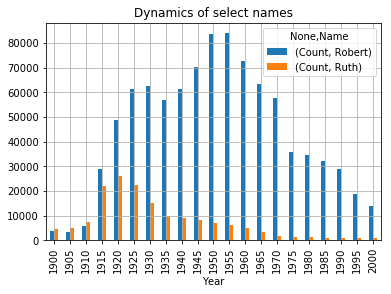

In [5]:
dynamics_names(1900, 2001, 5, 'bar')

### 3) Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год

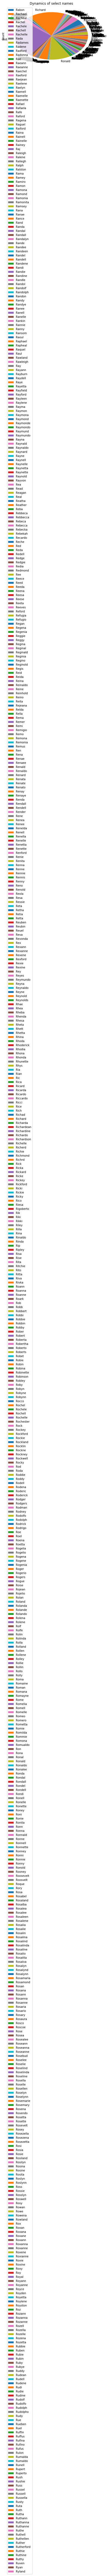

In [6]:
year = 1950
cols = ['Name', 'Gender','Count']
file = {}
file[year] = pd.read_csv(os.path.join(path_to_file,'yob{0}.txt'.format(year)), names=cols)
names_all = pd.concat(file, names=['Year'])
names_dynamics = names_all.groupby('Name').sum().filter(like='R', axis=0).plot(kind='pie', title='Dynamics of select names', grid=True, y='Count')

### 4) Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет.
* необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам,
* посчитать количество согласных букв в каждом имени и
* вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [39]:
def count_consonant(year_from, year_to, period):
    cols = ['Name', 'Gender','Count']
    file = {}
    for year in range(year_from, year_to, period):
        file[year] = pd.read_csv(os.path.join(path_to_file,'yob{0}.txt'.format(year)), names=cols)
    names_all = pd.concat(file)
    names_all['Letter_consonant'] = names_all['Name'].replace(r'[A, E, I, O, U, Y, a, e, i, o, u, y]', '', regex=True)
    names_all['Len'] = names_all.apply(lambda row: len(row.Letter_consonant), axis=1)
    response = names_all.plot.scatter(x='Len', y='Count', title='Dynamics of select names')
    return response

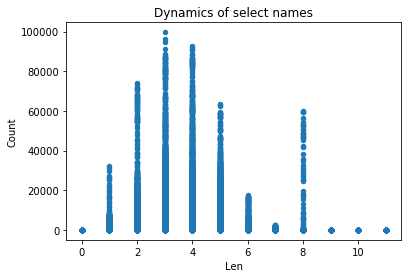

In [40]:
count_consonant(1900, 2001, 1)